In [1]:
import numpy as np
import pandas as pd
import pickle as pkl
import seaborn as sns
import sweetviz as sv
import xgboost as xgb
from sklearn import svm
import category_encoders as ce
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import FastICA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from pandas_profiling import ProfileReport
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from feature_engine.encoding import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
heart_dis_pred = pd.read_csv("heart_cleaned_encoded_smote.csv")

In [5]:
predictors = heart_dis_pred.drop("HeartDisease_No",axis=1)
target = heart_dis_pred["HeartDisease_No"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

# Random Forest with Scaling + SMOTE

In [6]:
%%time

max_accuracy = 0

for x in range(20):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)

Wall time: 27min 7s


RandomForestClassifier(random_state=6)

In [7]:
Y_pred_rf = rf.predict(X_test)

In [8]:
pkl.dump(rf, open('model_rf.pkl', 'wb'))

In [9]:
yTest = Y_test.to_frame(name = "HeartDisease_No")
tn, fp, fn, tp = confusion_matrix(yTest, Y_pred_rf).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

True negatives:  42683 
False positives:  4057 
False negatives:  476 
True Positives:  46360


In [10]:
print(classification_report(yTest, Y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95     46740
           1       0.92      0.99      0.95     46836

    accuracy                           0.95     93576
   macro avg       0.95      0.95      0.95     93576
weighted avg       0.95      0.95      0.95     93576



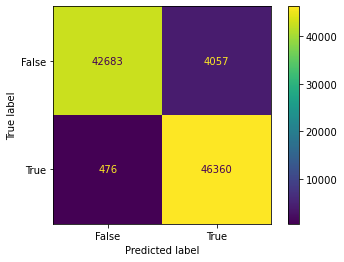

In [11]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(yTest['HeartDisease_No'], Y_pred_rf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

C:\Users\chemb\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


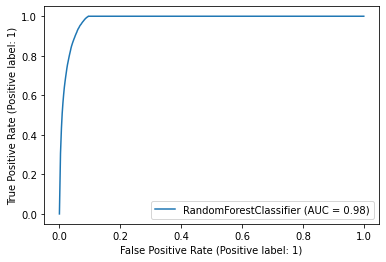

In [12]:
metrics.plot_roc_curve(rf, X_test, Y_test)

# Random Forest with Scaling + SMOTE + PCA

In [13]:
heart_dis_train_pred = pd.read_csv("heart_cleaned_encoded_trained_pca.csv")
heart_dis_test_pred = pd.read_csv("heart_cleaned_encoded_tested_pca.csv")

In [14]:
%%time
features = ['principal component 1','principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7','principal component 8','principal component 9','principal component 10','principal component 11','principal component 12','principal component 13','principal component 14','principal component 15','principal component 16','principal component 17','principal component 18','principal component 19','principal component 20']

max_accuracy = 0

for x in range(20):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(heart_dis_train_pred[features],heart_dis_train_pred["HeartDisease_No"])
    Y_pred_rf = rf.predict(heart_dis_test_pred[features])
    current_accuracy = round(accuracy_score(Y_pred_rf,heart_dis_test_pred["HeartDisease_No"])*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(heart_dis_train_pred[features],heart_dis_train_pred["HeartDisease_No"])

Wall time: 2h 58min 29s


RandomForestClassifier(random_state=5)

In [15]:
Y_pred_rf = rf.predict(heart_dis_test_pred[features])

In [16]:
pkl.dump(rf, open('model_rf_pca.pkl', 'wb'))

In [17]:
tn, fp, fn, tp = metrics.confusion_matrix(heart_dis_test_pred["HeartDisease_No"], Y_pred_rf).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

True negatives:  2453 
False positives:  3022 
False negatives:  7010 
True Positives:  51474


In [18]:
print(classification_report(heart_dis_test_pred["HeartDisease_No"], Y_pred_rf))

              precision    recall  f1-score   support

           0       0.26      0.45      0.33      5475
           1       0.94      0.88      0.91     58484

    accuracy                           0.84     63959
   macro avg       0.60      0.66      0.62     63959
weighted avg       0.89      0.84      0.86     63959



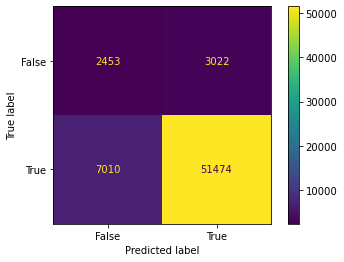

In [19]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(heart_dis_test_pred['HeartDisease_No'], Y_pred_rf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

C:\Users\chemb\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


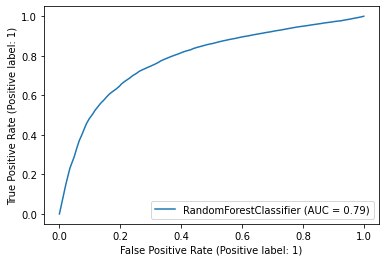

In [20]:
metrics.plot_roc_curve(rf, heart_dis_test_pred[features], heart_dis_test_pred["HeartDisease_No"])

# Random Forest with Scaling + SMOTE + ICA

In [21]:
heart_dis_train_pred = pd.read_csv("heart_cleaned_encoded_trained_ica.csv")
heart_dis_test_pred = pd.read_csv("heart_cleaned_encoded_tested_ica.csv")

In [22]:
%%time

features = ['independent component 1','independent component 2','independent component 3','independent component 4','independent component 5','independent component 6','independent component 7','independent component 8','independent component 9','independent component 10','independent component 11','independent component 12','independent component 13','independent component 14','independent component 15','independent component 16','independent component 17','independent component 18','independent component 19','independent component 20']
max_accuracy = 0

for x in range(20):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(heart_dis_train_pred[features],heart_dis_train_pred["HeartDisease_No"])
    Y_pred_rf = rf.predict(heart_dis_test_pred[features])
    current_accuracy = round(accuracy_score(Y_pred_rf,heart_dis_test_pred["HeartDisease_No"])*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(heart_dis_train_pred[features],heart_dis_train_pred["HeartDisease_No"])

Wall time: 2h 28min 34s


RandomForestClassifier(random_state=2)

In [23]:
Y_pred_rf = rf.predict(heart_dis_test_pred[features])

In [24]:
pkl.dump(rf, open('model_rf_ica.pkl', 'wb'))

In [25]:
tn, fp, fn, tp = metrics.confusion_matrix(heart_dis_test_pred["HeartDisease_No"], Y_pred_rf).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

True negatives:  2222 
False positives:  3253 
False negatives:  6349 
True Positives:  52135


In [26]:
print(classification_report(heart_dis_test_pred["HeartDisease_No"], Y_pred_rf))

              precision    recall  f1-score   support

           0       0.26      0.41      0.32      5475
           1       0.94      0.89      0.92     58484

    accuracy                           0.85     63959
   macro avg       0.60      0.65      0.62     63959
weighted avg       0.88      0.85      0.86     63959



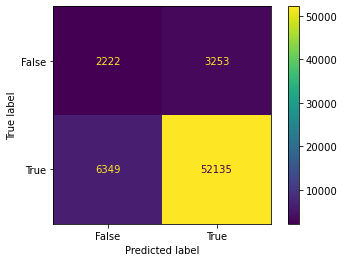

In [27]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(heart_dis_test_pred['HeartDisease_No'], Y_pred_rf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

C:\Users\chemb\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


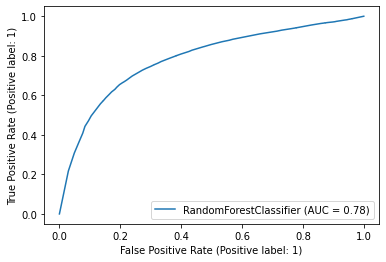

In [28]:
metrics.plot_roc_curve(rf, heart_dis_test_pred[features], heart_dis_test_pred["HeartDisease_No"])

# Random Forest with Scaling + SMOTE + LDA

In [29]:
heart_dis_train_pred = pd.read_csv("heart_cleaned_encoded_trained_lda.csv")
heart_dis_test_pred = pd.read_csv("heart_cleaned_encoded_tested_lda.csv")

In [30]:
%%time

features = ['lda 1']

max_accuracy = 0

for x in range(20):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(heart_dis_train_pred[features],heart_dis_train_pred["HeartDisease_No"])
    Y_pred_rf = rf.predict(heart_dis_test_pred[features])
    current_accuracy = round(accuracy_score(Y_pred_rf,heart_dis_test_pred["HeartDisease_No"])*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(heart_dis_train_pred[features],heart_dis_train_pred["HeartDisease_No"])

Wall time: 1h 12min 37s


RandomForestClassifier(random_state=16)

In [31]:
Y_pred_rf = rf.predict(heart_dis_test_pred[features])

In [32]:
pkl.dump(rf, open('model_rf_lda.pkl', 'wb'))

In [33]:
tn, fp, fn, tp = metrics.confusion_matrix(heart_dis_test_pred["HeartDisease_No"], Y_pred_rf).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

True negatives:  3634 
False positives:  1841 
False negatives:  18391 
True Positives:  40093


In [34]:
print(classification_report(heart_dis_test_pred["HeartDisease_No"], Y_pred_rf))

              precision    recall  f1-score   support

           0       0.16      0.66      0.26      5475
           1       0.96      0.69      0.80     58484

    accuracy                           0.68     63959
   macro avg       0.56      0.67      0.53     63959
weighted avg       0.89      0.68      0.75     63959



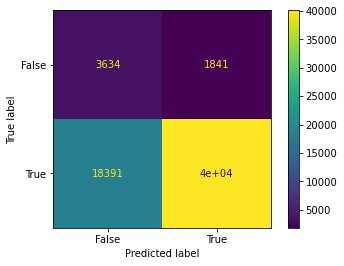

In [35]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(heart_dis_test_pred['HeartDisease_No'], Y_pred_rf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

C:\Users\chemb\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


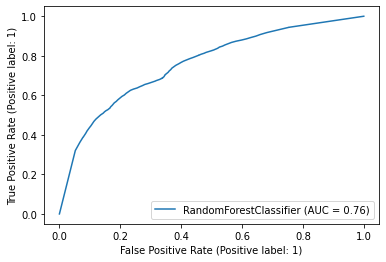

In [36]:
metrics.plot_roc_curve(rf, heart_dis_test_pred[features], heart_dis_test_pred["HeartDisease_No"])